In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\diamonds.csv\diamonds.csv")

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 11)

In [6]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
df.duplicated().sum()

146

In [12]:
df = df[(df[['x','y','z']]!=0).all(axis=1)]

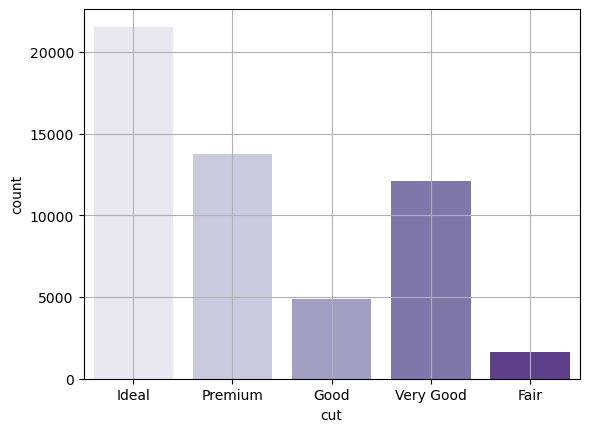

In [13]:
sns.countplot(x='cut', data=df, palette='Purples')
plt.grid(True)



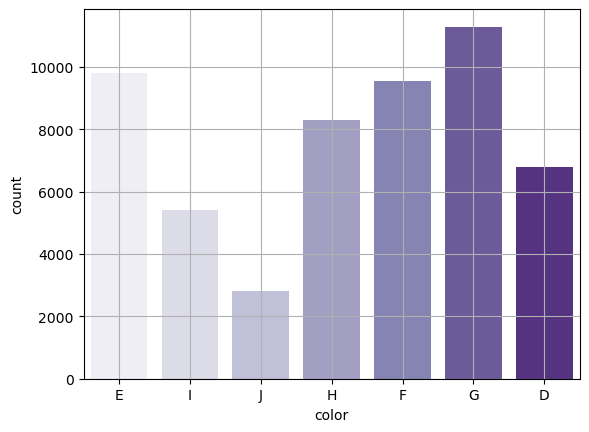

In [14]:
sns.countplot(x='color', data=df, palette='Purples')
plt.grid(True)

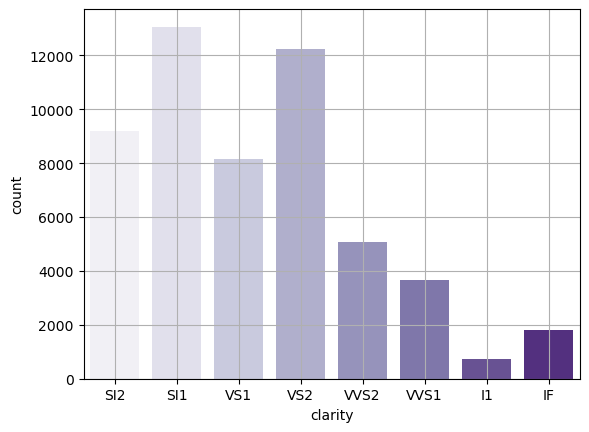

In [15]:
sns.countplot(x='clarity', data=df, palette='Purples')
plt.grid(True)

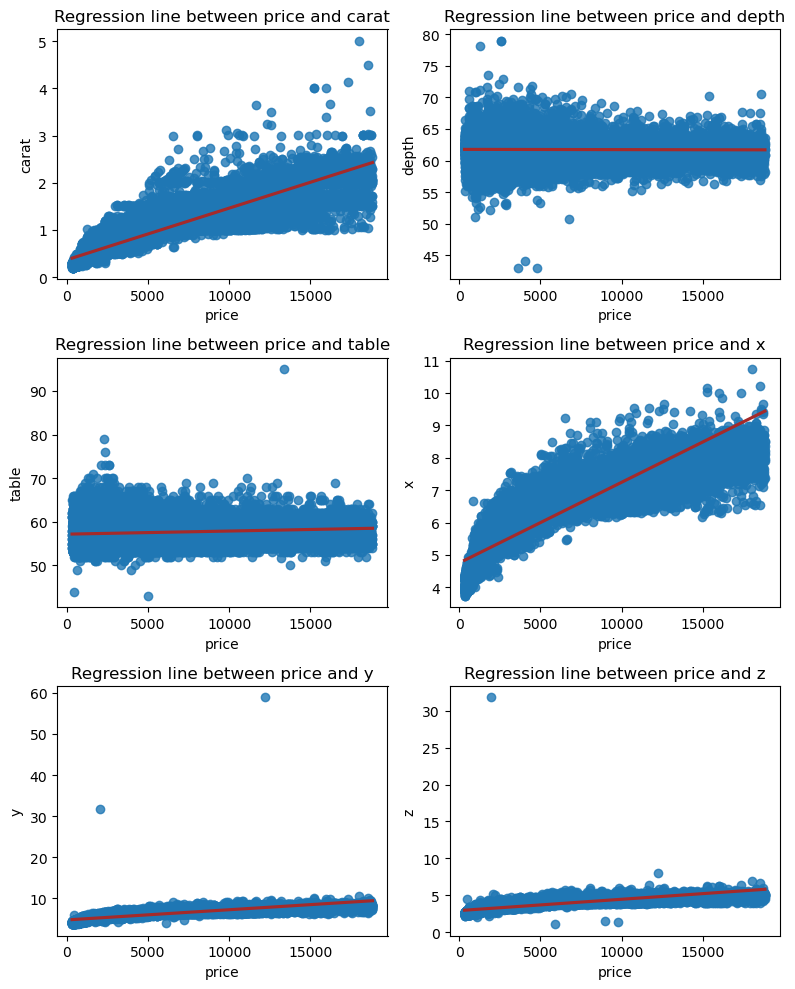

In [16]:

col = ['carat','depth','table','x','y','z']
plt.figure(figsize=(8,10))
plotnumber=1
for i in col:
    ax=plt.subplot(3,2,plotnumber)
    sns.regplot(x='price', y=i, data=df, line_kws={'color':'brown'})
    plt.title(f"Regression line between price and {i}")
    plotnumber+=1
plt.tight_layout()

In [17]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>45)]
df = df[(df["x"]<9.5)]
df = df[(df["y"]<15)]
df = df[(df["z"]<10)&(df["z"]>2)]
df.shape

(53893, 10)

In [120]:
from sklearn.preprocessing import LabelEncoder
df2 = df.copy()
col = ['cut','color','clarity']
le = LabelEncoder()
ls={}
for x in col:
    df2[x] = le.fit_transform(df2[x])
   # print(le.classes_)
    ls[x] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"{x} mapping:", ls[x])

cut mapping: {'Fair': 0, 'Good': 1, 'Ideal': 2, 'Premium': 3, 'Very Good': 4}
color mapping: {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}
clarity mapping: {'I1': 0, 'IF': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7}


In [69]:
df2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:>

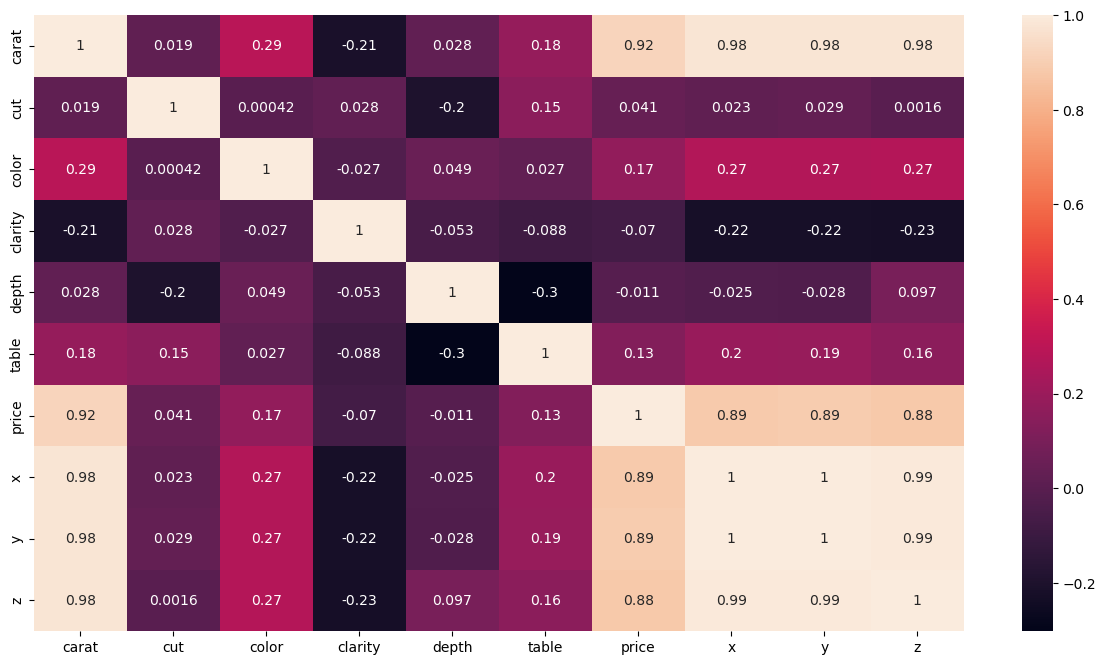

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(df2.corr(), annot=True)

In [21]:
from sklearn.model_selection import train_test_split

X = df2.drop('price',axis=1)
y = df2['price']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [22]:
col

['cut', 'color', 'clarity']

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [109]:
from sklearn.metrics import r2_score

results = []
models = {'Linear Regression': LinearRegression(),
          'K Neighbours Regression': KNeighborsRegressor(),
          'Decision Tree': DecisionTreeRegressor(),
          
          'Random Forest Regression': RandomForestRegressor(),
          #'Support Vector Regression': SVR(),
         }

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r = r2_score(y_test, y_pred)

    print(name)
    print('Accuracy Score:', r) 
    print()

    results.append({'Model': name, 'R2_score': r})

score_df = pd.DataFrame(results)


Linear Regression
Accuracy Score: 0.8909689721535924

K Neighbours Regression
Accuracy Score: 0.9475927312177722

Decision Tree
Accuracy Score: 0.9661788833988939

Random Forest Regression
Accuracy Score: 0.9811329223651262



In [26]:
score_df


,Model,R2_score
0,Linear Regression,0.890673
1,K Neighbours Regression,0.947105
2,Decision Tree,0.966010
3,Random Forest Regression,0.980998


Text(0.5, 0, 'Models')

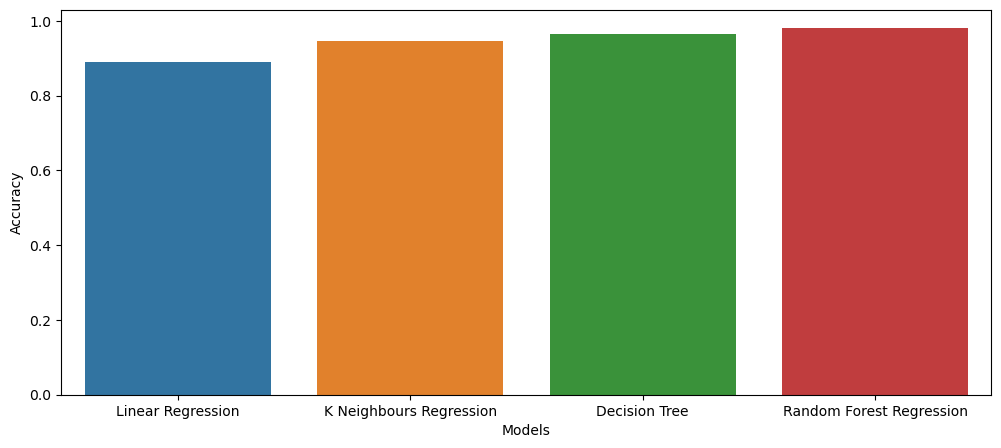

In [31]:
plt.figure(figsize=(12,5))

sns.barplot(x='Model',y='R2_score', data=score_df)
plt.ylabel("Accuracy")
plt.xlabel("Models")

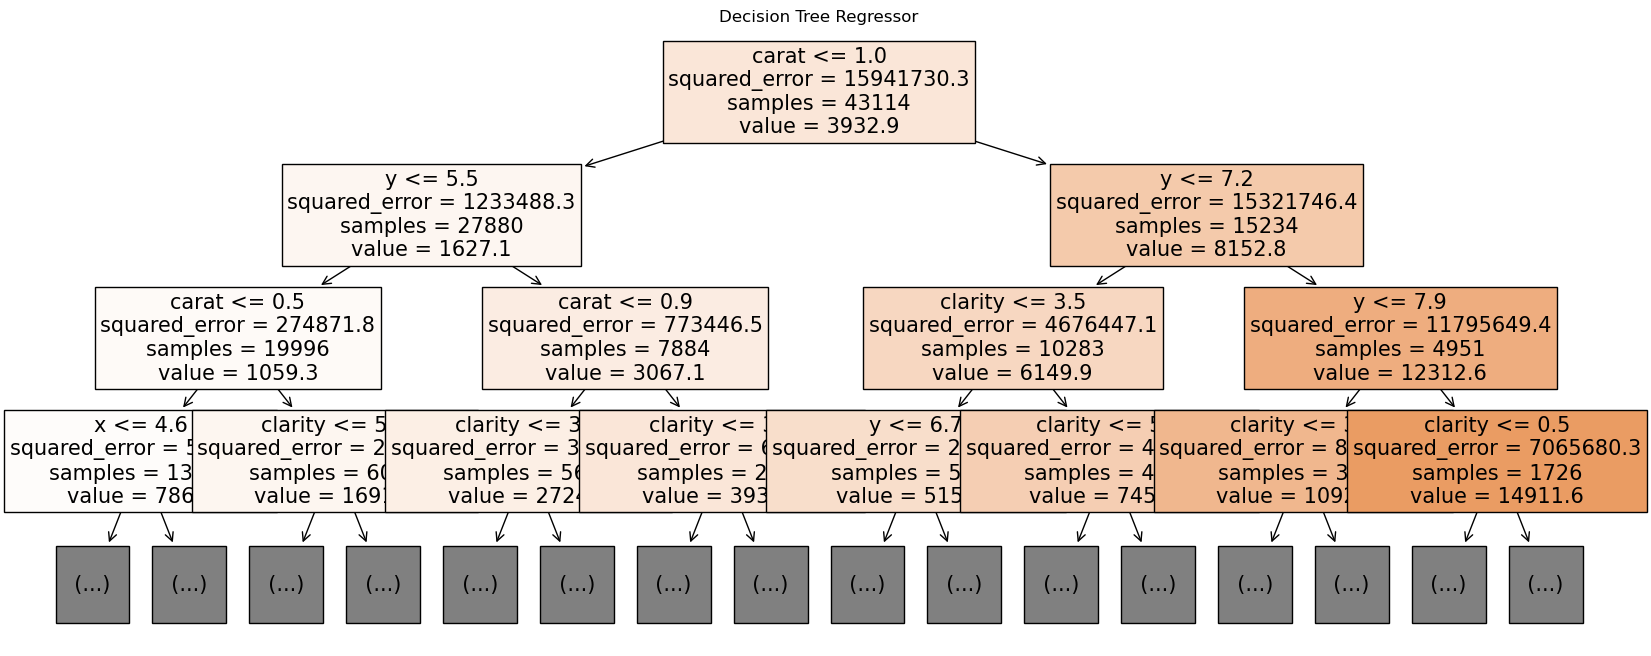

In [48]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train) 
# Now visualize
plt.figure(figsize=(20,8))
plot_tree(dt_model, feature_names=X.columns, filled=True, fontsize=15, max_depth=3,precision=1  )
plt.title("Decision Tree Regressor")
plt.show()


In [116]:
for x in df2.columns:
    if x!='price':
        print(x)
        print(df2[x].min())

carat
0.2
cut
0
color
0
clarity
0
depth
50.8
table
49.0
x
3.73
y
3.68
z
2.06


In [112]:

input_data = [[df2[x].mean() for x in df2.columns if x != 'price']]

p_pre=[]

print("Predicted price from each model using mean input:\n")

for name, model in models.items():
    y_pred = model.predict(input_data)
    print(f"{name}: {y_pred[0]:.2f}")
    p_pre.append({'Model': name, 'priee': y_pred[0]})
    


Predicted price from each model using mean input:

Linear Regression: 3928.96
K Neighbours Regression: 3150.20
Decision Tree: 3431.00
Random Forest Regression: 3048.31


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<BarContainer object of 4 artists>

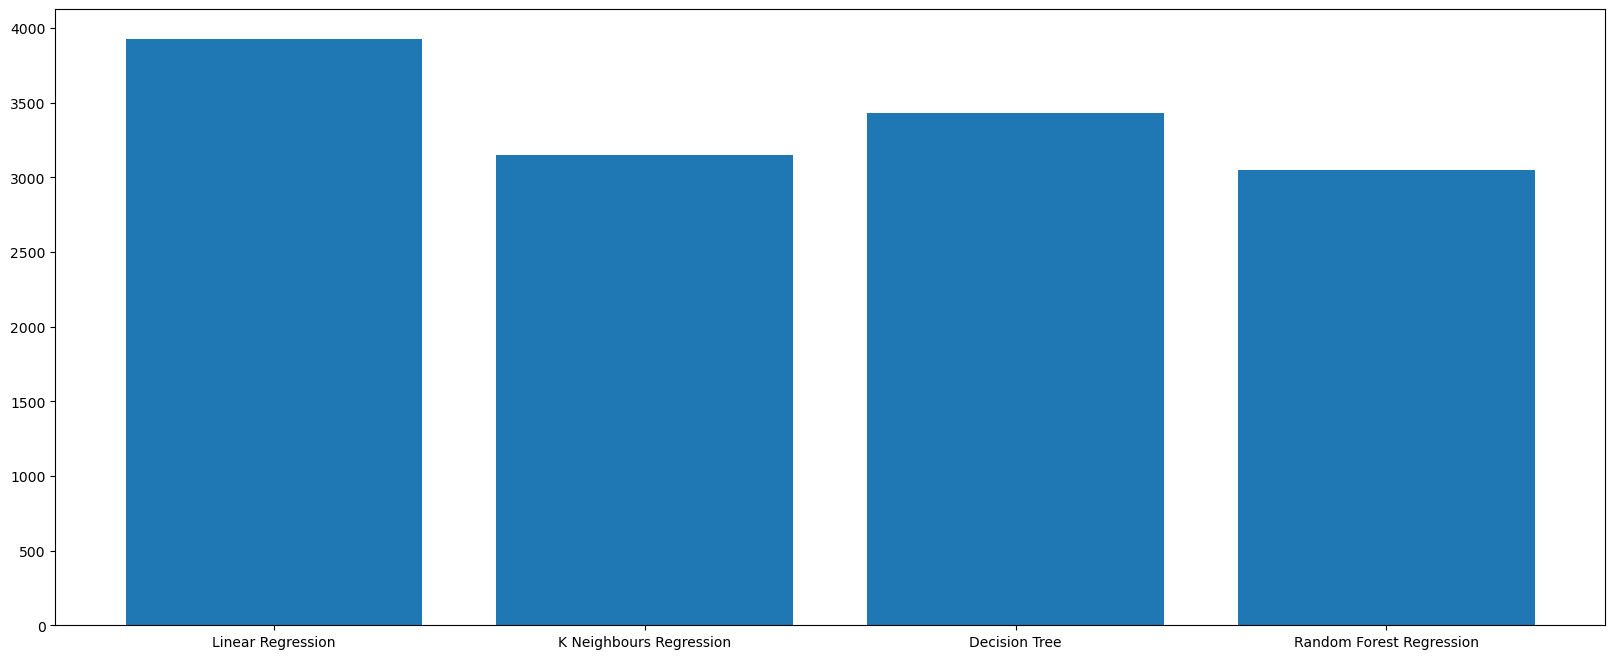

In [114]:
modelsA= [item['Model'] for item in p_pre]
scoresA = [item['priee'] for item in p_pre]
plt.figure(figsize=(20,8))
plt.bar(modelsA,scoresA)